# Hiperparametrizacion para Clasificación: Predicción de presencia de Cardiopatía

1. Preparación de Datos
2. División de los Datos
3. Hiperparametrización con el 70%
4. Evaluación del mejor Modelo con el 30%
5. Guardar el Modelo

# 1. Preparación de Datos

In [35]:
#Cargamos librerías principales
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [36]:
#Cargamos los datos preparados Heart_Disease_Predictio_READY.csv
data = pd.read_csv("Heart_Disease_Predictio_READY.csv")
data.head()

,Unnamed: 0,Age,Sex,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,322,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,564,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,261,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,263,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,269,2,121,1,0.2,1,1,3,Absence


In [37]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   EKG results              270 non-null    int64  
 6   Max HR                   270 non-null    int64  
 7   Exercise angina          270 non-null    int64  
 8   ST depression            270 non-null    float64
 9   Slope of ST              270 non-null    int64  
 10  Number of vessels fluro  270 non-null    int64  
 11  Thallium                 270 non-null    int64  
 12  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 27.6+ KB


In [38]:
# Pasamos variables numericas a categoricas.
data['Sex']=data['Sex'].astype('category')
data['Chest pain type']=data['Chest pain type'].astype('category')
data['EKG results']=data['EKG results'].astype('category')
data['Exercise angina']=data['Exercise angina'].astype('category')
data['Slope of ST']=data['Slope of ST'].astype('category')
data['Number of vessels fluro']=data['Number of vessels fluro'].astype('category')
data['Thallium']=data['Thallium'].astype('category')
data['Heart Disease']=data['Heart Disease'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               270 non-null    int64   
 1   Age                      270 non-null    int64   
 2   Sex                      270 non-null    category
 3   Chest pain type          270 non-null    category
 4   Cholesterol              270 non-null    int64   
 5   EKG results              270 non-null    category
 6   Max HR                   270 non-null    int64   
 7   Exercise angina          270 non-null    category
 8   ST depression            270 non-null    float64 
 9   Slope of ST              270 non-null    category
 10  Number of vessels fluro  270 non-null    category
 11  Thallium                 270 non-null    category
 12  Heart Disease            270 non-null    category
dtypes: category(8), float64(1), int64(4)
memory usage: 13.9 KB


In [39]:
# Eliminar variable Unnamed:0
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Age,Sex,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,322,2,109,0,2.4,2,3,3,Presence
1,67,0,3,564,2,160,0,1.6,2,0,7,Absence
2,57,1,2,261,0,141,0,0.3,1,0,7,Presence
3,64,1,4,263,0,105,1,0.2,2,1,7,Absence
4,74,0,2,269,2,121,1,0.2,1,1,3,Absence


<Axes: xlabel='Heart Disease'>

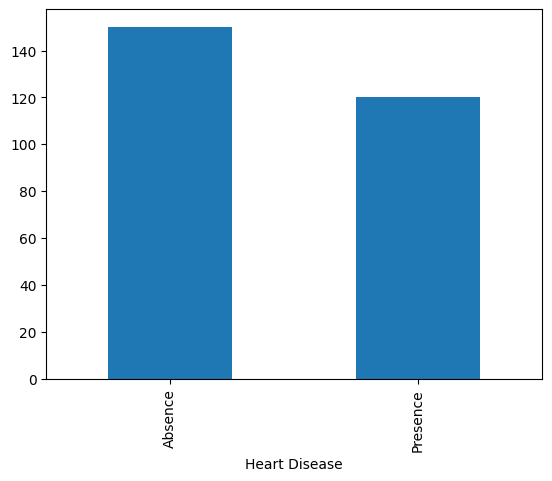

In [40]:
#Descripción variables categóricas
data['Heart Disease'].value_counts().plot(kind='bar')

In [41]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
data = pd.get_dummies(data, columns=['Chest pain type', 'Number of vessels fluro', 'Thallium', 'EKG results', 'Slope of ST'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['Sex', 'Exercise angina'], drop_first=True, dtype=int)
data.head()

,Age,Cholesterol,Max HR,ST depression,Heart Disease,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,Number of vessels fluro_0,...,Thallium_6,Thallium_7,EKG results_0,EKG results_1,EKG results_2,Slope of ST_1,Slope of ST_2,Slope of ST_3,Sex_1,Exercise angina_1
0,70,322,109,2.4,Presence,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1,67,564,160,1.6,Absence,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
2,57,261,141,0.3,Presence,0,1,0,0,1,...,0,1,1,0,0,1,0,0,1,0
3,64,263,105,0.2,Absence,0,0,0,1,0,...,0,1,1,0,0,0,1,0,1,1
4,74,269,121,0.2,Absence,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [42]:
#Se codifican las categorias de la VARIABLE OBJETIVO (Cambiar Absence y Presence por 0 y 1)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Heart Disease"]=labelencoder.fit_transform(data["Heart Disease"]) #Objetivo

data.head()

,Age,Cholesterol,Max HR,ST depression,Heart Disease,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,Number of vessels fluro_0,...,Thallium_6,Thallium_7,EKG results_0,EKG results_1,EKG results_2,Slope of ST_1,Slope of ST_2,Slope of ST_3,Sex_1,Exercise angina_1
0,70,322,109,2.4,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1,67,564,160,1.6,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
2,57,261,141,0.3,1,0,1,0,0,1,...,0,1,1,0,0,1,0,0,1,0
3,64,263,105,0.2,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,1,1
4,74,269,121,0.2,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1


# 2. División 70-30

<Axes: xlabel='Heart Disease'>

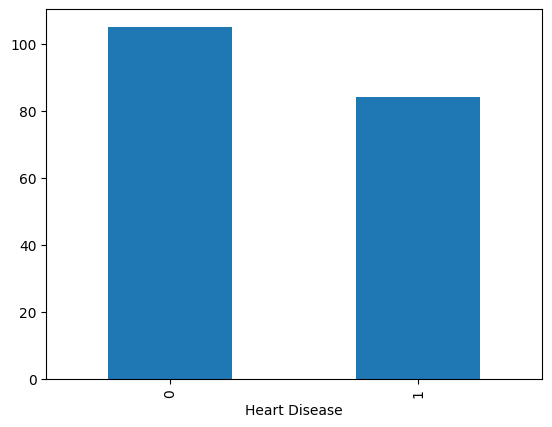

In [43]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Heart Disease", axis = 1) # Variables predictoras
Y = data['Heart Disease'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='Heart Disease'>

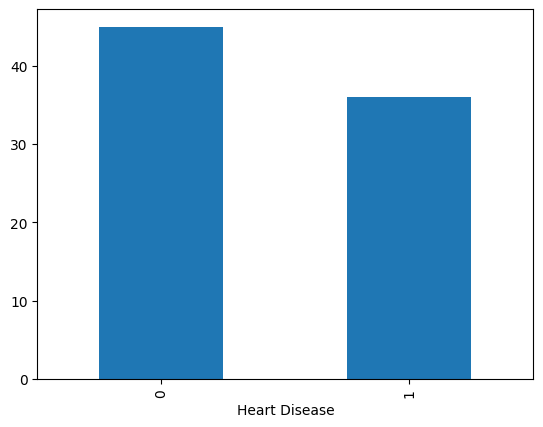

In [44]:
#Variable objetivo del 30%
Y_test.value_counts().plot(kind='bar')

# 3. Hiperparametrización con el 70%

# **Hiperparametrización Arbol de Decisión**


**NOTA:** Intentamos realizar la Hiperparametrización con el SVM pero fue imposible. Permanecio un tiempo de 1 hora en ejecución y nunca finalizo su proceso, por eso obtamos por la decisión de realizar la Hiperparametrización con Arbol de Decisiones.


Configuración que tenia el SVM:

In [45]:

# #SVM
# from sklearn.svm import SVC
# modelSVM = SVC()

# # Definir los hiperparametros
# C=[0.1,1,10] #Margen blando 1
# kernel=['linear', 'rbf','poly'] #'linear', 'poly', 'rbf', 'sigmoid'
# gamma=['scale','auto',0.01,5,3]

# #Hiperparametrización
# from sklearn.model_selection import GridSearchCV

# param_grid = dict(C=C, kernel=kernel,gamma=gamma)
# grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
# grid.fit(X_train, Y_train)

# #Mejor modelo
# modelSVM= grid.best_estimator_

# #Medida de evaluación del mejor modelo
# medidas['SVM']=grid.best_score_

# # Mejores párametros
# print( grid.best_params_)

# print(medidas)

In [46]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])

In [47]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier() # Instanciar parametrizacion

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,10,50,100] # Cantidad de registros por hoja
max_depth=[None, 10,20,50] #Niveles de profundidad

In [48]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth) # Configurar Diccionario
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10) #cv=10 grupos de validación cruzada, deberia ser en 10, siempre
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelTree= grid.best_estimator_


medidas['Tree']=grid.best_score_ #guarda la calidad del mejor de los modelos

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}
                 Tree
f1 de la CV  0.831817


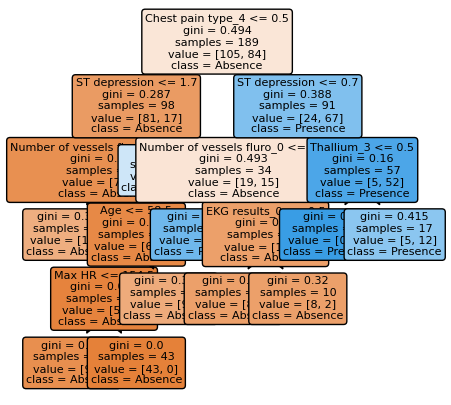

In [49]:
#Mejor modelo
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True, fontsize=8)
plt.show()

# 4. Evaluación del modelo

              precision    recall  f1-score   support

     Absence       0.75      0.73      0.74        45
    Presence       0.68      0.69      0.68        36

    accuracy                           0.72        81
   macro avg       0.71      0.71      0.71        81
weighted avg       0.72      0.72      0.72        81



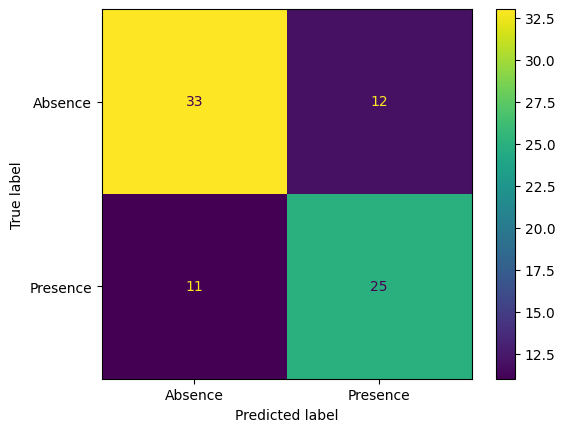

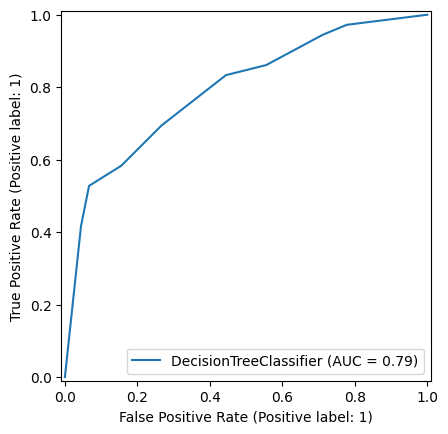

In [50]:
#Evaluación del mejor Tree con el 30% (X_test sin normalizar)
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelTree,X_test, Y_test)

#5. Guardar Modelo

In [51]:
import pickle
filename = 'modelo-Arbol-clasi-hiper.pkl'
variables= X.columns._values
pickle.dump([modelTree,labelencoder,variables], open(filename, 'wb')) #write